In [88]:
import pandas as pd
import spacy
import sklearn
import json
import requests
import matplotlib.pyplot as plt


In [89]:


descriptive = pd.read_csv("descriptive_attributes.csv")
numeric = pd.read_csv("numeric_attributes.csv", low_memory = False)

In [90]:
numeric


,movieID,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
0,tt0034371,0,1941,\N,58,4.7,29.0,False
1,tt0148665,0,1941,\N,7,6.5,16.0,False
2,tt1032841,0,2006,\N,60,3.8,6.0,False
3,tt1495820,0,1998,\N,10,5.6,8.0,False
4,tt0115768,0,1996,\N,90,6.3,25.0,False
...,...,...,...,...,...,...,...,...
476276,tt0039160,0,1947,\N,86,5.7,408.0,NaN
476277,tt1199779,0,2013,\N,81,3.3,353.0,NaN
476278,tt3186036,0,2013,\N,108,8.2,125.0,NaN
476279,tt0836660,0,2002,\N,162,7.9,39.0,NaN


In [91]:
descriptive

,movieID,titleType,primaryTitle,originalTitle,genres
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History"
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama"
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama
...,...,...,...,...,...
466276,tt1288649,tvMovie,Un homme d'honneur,Un homme d'honneur,NaN
466277,tt1446672,movie,A Kiss for Jed,A Kiss for Jed Wood,NaN
466278,tt0388936,tvMovie,Fathers and Sons,Fathers and Sons,NaN
466279,tt0118489,tvMiniSeries,Thomas Jefferson,Thomas Jefferson,NaN


In [92]:
df = pd.merge(descriptive, numeric, on="movieID", how="inner")

In [93]:
df

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0,1979,1979,60,8.5,952.0,False
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0,1993,\N,163,7.8,790.0,False
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0,1941,\N,57,5.9,34.0,False
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0,2017,\N,28,5.4,177.0,False
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0,2009,\N,60,5.7,15.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
438692,tt1288649,tvMovie,Un homme d'honneur,Un homme d'honneur,NaN,0,2009,\N,95,7.1,38.0,False
438693,tt1446672,movie,A Kiss for Jed,A Kiss for Jed Wood,NaN,0,2011,\N,86,6.9,74.0,False
438694,tt0388936,tvMovie,Fathers and Sons,Fathers and Sons,NaN,0,2005,\N,101,6.0,400.0,True
438695,tt0118489,tvMiniSeries,Thomas Jefferson,Thomas Jefferson,NaN,0,1997,\N,180,7.7,727.0,False


In [94]:
IsGood_null_count = df["isGood"].isnull().sum()

In [95]:
IsGood_null_count
mean = df["averageRating"].mean()

In [99]:
mean


6.455673725690632

In [11]:
df["averageRating"].fillna(mean, inplace = True)

In [12]:
df["averageRating"].isna().sum()

0

In [103]:
next_data = df[(df["startYear"] > 2000) & (df["averageRating"] > 3)]

In [104]:
next_data

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0,2017,\N,28,5.4,177.0,False
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0,2009,\N,60,5.7,15.0,False
6,tt0412225,tvSeries,The Rise of the Celebrity Class,The Rise of the Celebrity Class,Documentary,0,2004,\N,200,6.8,20.0,False
8,tt13286468,tvSeries,I tourta tis mamas,I tourta tis mamas,Comedy,0,2020,\N,60,8.2,182.0,False
10,tt13550066,movie,10 Steps to Love,10 Steps to Love,Romance,0,2021,\N,90,7.7,19.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
438690,tt2207435,short,Anticyclone,Anticyclone,NaN,0,2011,\N,9,6.5,13.0,NaN
438692,tt1288649,tvMovie,Un homme d'honneur,Un homme d'honneur,NaN,0,2009,\N,95,7.1,38.0,False
438693,tt1446672,movie,A Kiss for Jed,A Kiss for Jed Wood,NaN,0,2011,\N,86,6.9,74.0,False
438694,tt0388936,tvMovie,Fathers and Sons,Fathers and Sons,NaN,0,2005,\N,101,6.0,400.0,True


In [105]:
len(next_data)

267543

Text(0, 0.5, 'broj filmova')

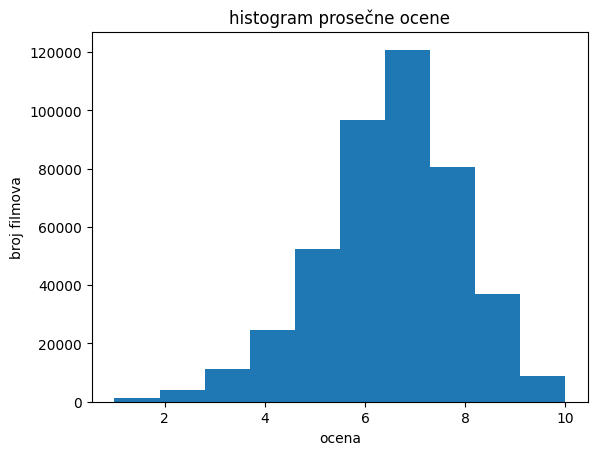

In [106]:
plt.hist(df["averageRating"], bins=10)
plt.title("histogram prosečne ocene")
plt.xlabel("ocena")
plt.ylabel("broj filmova")

In [107]:
avg_rating_by_genre = df.groupby("titleType")["averageRating"].mean()

In [109]:
avg_rating_by_genre

titleType
movie           6.142533
short           6.822709
tvMiniSeries    7.110391
tvMovie         6.578624
tvSeries        6.815256
tvShort         6.874603
tvSpecial       6.870781
video           6.502115
videoGame       6.740909
Name: averageRating, dtype: float64

In [51]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\Korisnik\PycharmProjects\Intens_Solutions\Scripts\python.exe -m pip install --upgrade pip' command.


In [52]:
import spacy

In [53]:
spacy

<module 'spacy' from 'C:\\Users\\Korisnik\\PycharmProjects\\Intens_Solutions\\lib\\site-packages\\spacy\\__init__.py'>

In [54]:
nlp = spacy.load("en_core_web_sm")

In [56]:
title_to_compare = "The French Connection"

In [57]:
def title_similarity(title):
    return nlp(title).similarity(nlp(title_to_compare))

In [61]:
df["similarity"] = df["originalTitle"].apply(title_similarity)

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_19104\822642808.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return nlp(title).similarity(nlp(title_to_compare))


In [62]:
top10 = df.sort_values("similarity", ascending= False).head(10)
top10

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
428804,tt0067116,movie,The French Connection,The French Connection,NaN,0,1971,\N,104,7.7,121516.0,False,1.000000
437485,tt0224582,movie,The Acadian Connection,The Acadian Connection,NaN,0,1995,\N,77,5.2,6.0,False,0.967389
94607,tt5133062,movie,The Brazilian Connection,The Brazilian Connection,"Action,Crime",0,2019,\N,77,8.3,17.0,False,0.965916
343648,tt0037693,movie,The Fatal Witness,The Fatal Witness,"Drama,Film-Noir,Mystery",0,1945,\N,65,5.9,122.0,False,0.954540
296380,tt1086057,short,The Italian Connection,The Italian Connection,"Drama,Short",0,2007,\N,24,7.1,15.0,False,0.952325
266798,tt0047000,movie,The French Line,The French Line,"Comedy,Musical,Romance",0,1953,\N,102,5.2,611.0,False,0.949424
167082,tt0444633,tvMovie,The French Revolution,The French Revolution,"Documentary,History",0,2005,\N,100,7.3,327.0,True,0.945747
361120,tt8847712,movie,The French Dispatch,The French Dispatch,"Comedy,Drama,Romance",0,2021,\N,107,7.2,110318.0,True,0.945605
391334,tt8655594,movie,The Mongolian Connection,The Mongolian Connection,Action,0,2019,\N,90,5.5,386.0,True,0.942669
90650,tt3187378,movie,The Asian Connection,The Asian Connection,"Action,Crime,Drama",0,2016,\N,90,3.2,1786.0,False,0.940551


In [63]:
titles = "".join(df["originalTitle"])

In [66]:
titles = titles.lower()
titles = titles.split()

In [70]:
words = [word for word in titles if word.isalnum()]

In [73]:
words_frequency = {}

In [74]:
for word in words:
    if word in words_frequency:
        words_frequency[word] += 1
    else:
        words_frequency[word] = 1


In [76]:
frequency_df = pd.DataFrame.from_dict(words_frequency, orient="index", columns=["frequency"])

In [77]:
frequency_df = frequency_df.sort_values(by="frequency", ascending=False)

In [78]:
print(frequency_df.head(10))

     frequency
the      38018
of       28778
a        10719
in        9961
de        9665
and       9261
to        7345
no        4496
la        3892
for       3871


In [79]:
repsonse = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
data = repsonse.json()

In [80]:
data

{'time': {'updated': 'Apr 23, 2023 21:08:00 UTC',
  'updatedISO': '2023-04-23T21:08:00+00:00',
  'updateduk': 'Apr 23, 2023 at 22:08 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '27,536.9232',
   'description': 'United States Dollar',
   'rate_float': 27536.9232},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '23,009.6327',
   'description': 'British Pound Sterling',
   'rate_float': 23009.6327},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '26,824.9836',
   'description': 'Euro',
   'rate_float': 26824.9836}}}

In [84]:
bpi = data["bpi"]
usd_float_rate = data["bpi"]["USD"]["rate_float"]
usd_float_rate

27536.9232

In [85]:
bpi

{'USD': {'code': 'USD',
  'symbol': '&#36;',
  'rate': '27,536.9232',
  'description': 'United States Dollar',
  'rate_float': 27536.9232},
 'GBP': {'code': 'GBP',
  'symbol': '&pound;',
  'rate': '23,009.6327',
  'description': 'British Pound Sterling',
  'rate_float': 23009.6327},
 'EUR': {'code': 'EUR',
  'symbol': '&euro;',
  'rate': '26,824.9836',
  'description': 'Euro',
  'rate_float': 26824.9836}}